# Introduction

## Motivation and Overview
Expressing emontions plays an important role in communicating, especially during this COVID-19 situation. While staying at home, there is a growing need for people to do video chatting. This project aims to propose an interesting application on changing the background of a video chat based on people's real-time emotion status. With this application, people have another option to express their feelings during the video chat and communicate in a more efficient way. In this project, I made use of machine learning-based approach to do emotion detection on raw EEG data collected by MUSE 2. 


# Related Work

## MOHNAB-HCI database
In order to have enough EEG data for the model training purpose, I decide to use MOHNAB-HCI database, a publicly available database for multimedia implicit tagging [1]. MAHNOB-HCI includes recordings from two experiments. The recordings that were used in this project are from the experiment where the researchers recorded participants’ emotional responses to short videos with the goal of emotional tagging. 30 participants were shown fragments of movies, while monitoring them with 6 video cameras, a head-worn microphone, an eye gaze tracker, as well as physiological sensors measuring ECG, EEG (32 channels), respiration amplitude, and skin temperature. In paper [2], authors asked 5 experts to annotate the time-series data on a subset of 239 trails (every recorded response of a par- ticipant to a video is a trial). These experts annotated the valence (unpleasant to pleasant) level based on participants' recorded facial experssions as baseline. In this project, I used this annotated dataset as the trainning set. (dataset available at [3])

## EEG Data Analysis and Emotion Detection
Traditonally, there exists standard EEG data analysis pipeline, including preprocessing (filtering, artifacts removing, etc), time-domain and frequency domain analysis. However, with the rise of artificial intelligence, more and more attention has been paid on applying machine learning algorithms on EEG analysis. In this project, I also chose to adopt SVM, one of the most popular machine learning algorithms to conduct emotion analysis.


# Exploration

## First Experience and Data Collection
Before collecting EEG data for actual analysis, we first tried out the MUSE2 equipment and MUSE-LSL library to collect sample EEG data under two conditions: meditation and playing some musical instruments. In this section, I present some of the results when exploring the sample data. We have three participants. 

## Meditation vs Music Playing

    3.2.1 data preprocessing: use Muse-lsl to generate real-time visualizations; use filters to remove noise; etc
    3.2.2 data analysis: meditation vs. motion, use ratios of alpha wave to beta wave


### Data preprocessing:

In [69]:
import sys
from collections import OrderedDict

import mne
from mne.preprocessing import ICA
from mne import create_info, concatenate_raws
from mne.io import RawArray
from mne.channels import make_standard_montage

import pandas as pd
import numpy as np

from glob import glob
import seaborn as sns
from matplotlib import pyplot as plt

from utils import utils

%matplotlib inline

In [77]:
# Load data
subject = 'all'
session = 1
raw = utils.load_muse_csv_as_raw(['Meditation_XuHan.csv'], sfreq=256., ch_ind=[0, 1, 2, 3],
                                stim_ind=5,
                                replace_ch_names=None, verbose=1)

Meditation_XuHan.csv
Creating RawArray with float64 data, n_channels=5, n_times=45924
    Range : 0 ... 45923 =      0.000 ...   179.387 secs
Ready.


/Users/hanxu/Desktop/bai-book/content/labs/lab-muse/utils/utils.py:68: DeprecationWarning: Passing montage to create_info is deprecated and will be removed in 0.21, use raw.set_montage (or epochs.set_montage, etc.) instead
  sfreq=sfreq, montage=montage, verbose=verbose)


In [56]:
# Examine raw data
raw_TP9 = raw.pick_channels(['TP9'])
rawdata_TP9 = raw_TP9.get_data()
print(rawdata_TP9.T.shape)

(45924, 1)


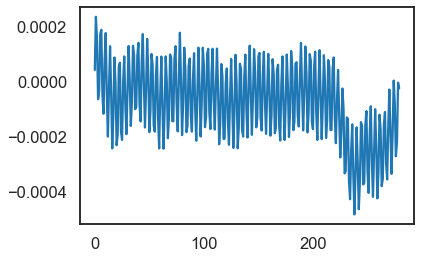

In [61]:
plt.plot(rawdata_TP9.T[5120:5400])

In [78]:
# Crop raw data
raw = raw.crop(tmin = 20 , tmax = 30)


Effective window size : 8.000 (s)


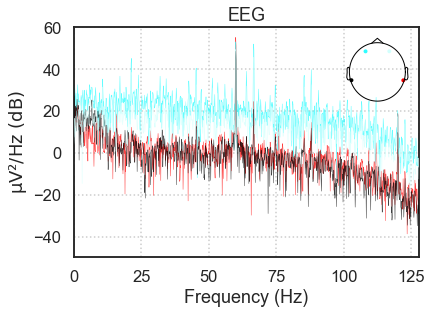

In [79]:
# Examine power spectrum
raw.plot_psd(tmax=np.inf);

In [80]:
# Apply bandpass filters
raw.filter(1, 30, method='iir')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz
Using filter length: 2561

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB



<RawArray | 5 x 2561 (10.0 s), ~120 kB, data loaded>

Effective window size : 8.000 (s)


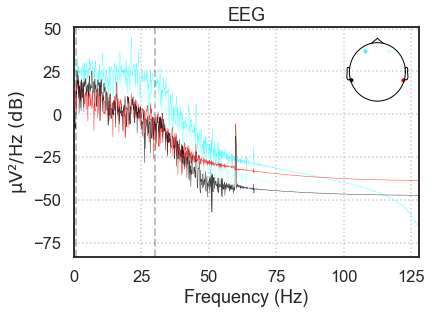

In [81]:
# Examine PSD again
raw.plot_psd(tmax=np.inf);

### Data analysis

In [75]:
import utils1

In [88]:
# Load data
subject = 'all'
session = 1
raw_med = utils.load_muse_csv_as_raw(['Meditation_XuHan.csv'], sfreq=256., ch_ind=[0, 1, 2, 3],
                                stim_ind=5,
                                replace_ch_names=None, verbose=1)

subject = 'all'
session = 1
raw_music = utils.load_muse_csv_as_raw(['GuitarPlaying_XuHan.csv'], sfreq=256., ch_ind=[0, 1, 2, 3],
                                stim_ind=5,
                                replace_ch_names=None, verbose=1)
## Crop raw data
raw_med = raw_med.crop(tmin = 20 , tmax = 150)
raw_music = raw_music.crop(tmin = 20 , tmax = 150)

# Apply bandpass filters
raw_med.filter(1, 30, method='iir')
raw_music.filter(1, 30, method='iir')

raw_ch_med = raw_med.pick_channels(['TP9','TP10','AF7','AF8'])
raw_ch_music = raw_music.pick_channels(['TP9','TP10','AF7','AF8'])
rawdata_matrix_med = raw_ch_med.get_data()
rawdata_matrix_music = raw_ch_music.get_data()
print(rawdata_matrix_med.T.shape)
print(rawdata_matrix_music.T.shape)

Meditation_XuHan.csv
Creating RawArray with float64 data, n_channels=5, n_times=45924
    Range : 0 ... 45923 =      0.000 ...   179.387 secs
Ready.
GuitarPlaying_XuHan.csv
Creating RawArray with float64 data, n_channels=5, n_times=45924
    Range : 0 ... 45923 =      0.000 ...   179.387 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz
Using filter length: 33281

IIR filter parameters


/Users/hanxu/Desktop/bai-book/content/labs/lab-muse/utils/utils.py:68: DeprecationWarning: Passing montage to create_info is deprecated and will be removed in 0.21, use raw.set_montage (or epochs.set_montage, etc.) instead
  sfreq=sfreq, montage=montage, verbose=verbose)
/Users/hanxu/Desktop/bai-book/content/labs/lab-muse/utils/utils.py:68: DeprecationWarning: Passing montage to create_info is deprecated and will be removed in 0.21, use raw.set_montage (or epochs.set_montage, etc.) instead
  sfreq=sfreq, montage=montage, verbose=verbose)


---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz
Using filter length: 33281

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

(33281, 4)
(33281, 4)


In [89]:
class Band:
    Delta = 0
    Theta = 1
    Alpha = 2
    Beta = 3
band_powers_med = utils1.compute_band_powers(rawdata_matrix_med.T, 256)
band_powers_music = utils1.compute_band_powers(rawdata_matrix_music.T, 256)
theta_metric_med = band_powers_med[Band.Theta] / \
            band_powers_med[Band.Alpha]
print('Theta Relaxation Med: ', theta_metric_med)
theta_metric_music = band_powers_music[Band.Theta] / \
            band_powers_music[Band.Alpha]
print('Theta Relaxation Muisc: ', theta_metric_music)

Theta Relaxation Med:  0.954793397034791
Theta Relaxation Med:  0.9351215792299952


# Method

## Data Collection
As aforementioned, the training data is from MAHNOB-HCI dataset. I then ran the model on the EEG data collected from 3 participants while they watching a video clip from "Friends". We still used MUSE2. 

## Data Analysis

### Feature Extraction and Model Training
The data was first preprocessed through being cropped, filtered and ICA-analyzed [2]. Then, like the analysis from last section, the features were extracted as follows: The logarithms of the PSD from theta (4Hz < f < 8Hz), alpha (8Hz < f < 12Hz), beta (12Hz < f < 30Hz) and gamma (30Hz < f) bands were extracted to serve as features. In total, the number of EEG features of a trial for 32 electrodes (channels) and four bands is 32 * 4 = 128 features. These features were available at 2 Hz temporal resolution due to the STFT window size (256). To train the model, I used SVM, one of the most popular machine learning algorithms and has been shown effective at modeling EEG data [4].

In [91]:
from scipy.sparse import *
import scipy.io as sio
from scipy.stats.stats import pearsonr
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [92]:
def loadData (dataFolder,annotedTrial):     
    dataNum = 0
    for cnt,ParTrial in enumerate(annotedTrial):
        dataAddress ="{}P{}-features-resamp4hz-trial-{}.mat".format(dataFolder,ParTrial[0],ParTrial[1])
        if cnt==0:
                    features_label =sio.loadmat(dataAddress)
        features_label[cnt] =sio.loadmat(dataAddress)
        dataNum +=np.shape((features_label[cnt]['face_feats']))[0]
    return features_label, dataNum




def normalizeDataSubjet(annotedTrial,features_label,dataNum):   
    faceFe = np.zeros((dataNum,38))
    eegFe = np.zeros((dataNum,128))
    target = np.zeros((dataNum,1))
    startTrial = int(0)
    trialNum = int(np.shape(annotedTrial)[0])
    lengthTrial = []
    partNumSample = 0
    partTrial = []
    for cnt,ParTrial in enumerate(annotedTrial):
        
        endTrial = startTrial + int(lengthTrial[cnt])
        
        eegFe[startTrial:endTrial,:]   = features_label[cnt]['eeg_band_feats_full']
        target [startTrial:endTrial,:] = np.transpose(features_label[cnt]['target'])
        
        startTrial = endTrial
        
        if cnt>0:
            if annotation['trials_included'][cnt,0]==annotation['trials_included'][cnt-1,0] and cnt!= trialNum-1 :
                partNumSample += int(lengthTrial[cnt])

            else:
                if cnt == trialNum-1:
                    partNumSample += int(lengthTrial[cnt])
                start = int(np.sum(partTrial))
                faceFe[start:int(start+partNumSample),:] = preprocessing.scale(faceFe[start:int(start+partNumSample),:])
                eegFe[start:int(start+partNumSample),:] = preprocessing.scale(eegFe[start:int(start+partNumSample),:])
                partTrial.append(partNumSample)
                partNumSample = int(lengthTrial[cnt])

        else:
            partNumSample = int(lengthTrial[cnt])
            
    return faceFe, eegFe, target, lengthTrial 



In [102]:
#split data parameter
trainShare = 0.8

dataFolder = './data/Features/'
annotationAdd = './data/lable_continous_Mahnob.mat'
annotation = sio.loadmat(annotationAdd)
features_label, dataNum = loadData(dataFolder,annotation['trials_included'])
faceFe, eegFe, target, lengthTrial = normalizeDataSubjet(annotation['trials_included'],features_label,dataNum)
maxLen = int(np.max(lengthTrial))
seqNum = len(annotation['trials_included'])

eegFe = eegFe[:,[0,1,2,3,116,117,118,119,40,41,42,43,76,77,78,79]]

trainSize = int(trainShare*len(eegFe))
trainEeg, testEeg = eegFe[0:trainSize,:],eegFe[trainSize:,:]
trainLabel, testLabel = target[0:trainSize,:],target[trainSize:,:]

model = SVR(C=1.0, epsilon=0.2)
model.fit(trainEeg, trainLabel)

/Users/hanxu/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Model Evaluation
I used 8:2 to split the data and evaluate the SVM model.

In [94]:
pred = model.predict(testEeg)
print(mean_squared_error(pred,testLabel))

0.015268400199085076


### Apply the Model on Self-collected Data

In [129]:
# Load data
subject = 'all'
session = 1
raw = utils.load_muse_csv_as_raw(['happy_video_Xu.csv'], sfreq=256., ch_ind=[0, 1, 2, 3],
                                stim_ind=5,
                                replace_ch_names=None, verbose=1)
## Crop raw data
raw = raw.crop(tmin = 20 , tmax = 90)

# Apply bandpass filters
raw.filter(1, 30, method='iir')

raw_ch = raw.pick_channels(['TP9','TP10','AF7','AF8'])
rawdata_matrix = raw_ch.get_data()

#epoch = utils1.epoch(rawdata_matrix.T, 256, 128)
#print(epoch.shape)

band_powers_TP9 = []
band_powers_TP10 = []
band_powers_AF7 = []
band_powers_AF8 = []


for i in range(0, rawdata_matrix.T.shape[0], 256):
    raw_TP9 = rawdata_matrix.T[i:i+256,[0]]
    raw_TP10 = rawdata_matrix.T[i:i+256,[1]]
    raw_AF7 = rawdata_matrix.T[i:i+256,[2]]
    raw_AF8 = rawdata_matrix.T[i:i+256,[3]]

# Feature extraction
    band_powers_TP9.append(utils1.compute_band_powers(raw_TP9, 256))
    
    band_powers_TP10.append(utils1.compute_band_powers(raw_TP10, 256))
    band_powers_AF7.append(utils1.compute_band_powers(raw_AF7, 256))
    band_powers_AF8.append(utils1.compute_band_powers(raw_AF8, 256))
    
band_powers_TP9 = np.array(band_powers_TP9)
band_powers_TP10 = np.array(band_powers_TP10)
band_powers_AF7 = np.array(band_powers_AF7)
band_powers_Af8 = np.array(band_powers_AF8)

features = np.concatenate((band_powers_TP9, band_powers_TP10, band_powers_AF7,
                                     band_powers_Af8), axis=1)
print(features[:-1].shape)



happy_video_Xu.csv
Creating RawArray with float64 data, n_channels=5, n_times=30552
    Range : 0 ... 30551 =      0.000 ...   119.340 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz
Using filter length: 17921

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB



/Users/hanxu/Desktop/bai-book/content/labs/lab-muse/utils/utils.py:68: DeprecationWarning: Passing montage to create_info is deprecated and will be removed in 0.21, use raw.set_montage (or epochs.set_montage, etc.) instead
  sfreq=sfreq, montage=montage, verbose=verbose)
/Users/hanxu/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/hanxu/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(70, 16)


# Results & Discussion

## Visualization



Text(0, 0.5, 'valence')

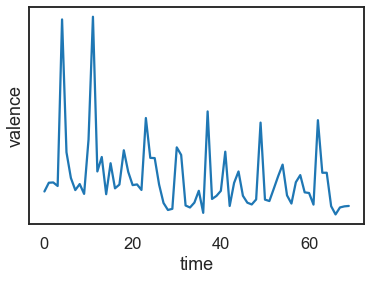

In [145]:
genearted = model.predict(features[:-1])
fig = plt.plot()
plt.plot(genearted)
plt.yticks([],[])
plt.xlabel('time')
plt.ylabel('valence')

![title](laugh.jpeg)

# Conclusion

## Limitations
### Limitations of our equipments: 
We used MUSE2 to collect EEG data. However, only 4 channels are feasible here: Tp9, TP10, AF7, AF8. Also, for the MAHNOB-HCI dataset, the EEG data is collected with 32 electrodes, which have no exact corresponding map to TP9, TP10, AF7 and AF8. In order to solve this, I mannually selected 4 channels out of these 32, which share the similar locations to TP9, TP10, AF7 and AF8. All these limitations will lead to possible irreliablity of the results generated by the model.
### Annotations:
Because of the time limitation, I didn't have a chance to annotate the data we collected during class. The screenshot here is the result of a rough glance. Will annotate the data if had a chance in the future.

## Future Works

I am also really interested in using fNIRS to try similar emotion detection algorithms.

# Reference

[1] http://mahnob-db.eu/hci-tagging/
[2] M. Soleymani, S. Asghari-Esfeden, Y. Fu and M. Pantic, "Analysis of EEG Signals and Facial Expressions for Continuous Emotion Detection," in IEEE Transactions on Affective Computing, vol. 7, no. 1, pp. 17-28, 1 Jan.-March 2016. doi: 10.1109/TAFFC.2015.2436926
[3] https://github.com/soheilrayatdoost/ContinuousEmotionDetection
[4] Wiem, Mimoun Ben Henia, and Zied Lachiri. "Emotion classification in arousal valence model using MAHNOB-HCI database." Int. J. Adv. Comput. Sci. Appl. IJACSA 8.3 (2017).